In [15]:
def gradient_calculation(w, X, y):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    return (X.T @ (X @ w - y)) / len(y)

def multiple_linear_regression(X, y, lr = 1e-2, stopping_error = 0.000001):
    w = np.array([0.2, 0.2, 0.2])

    gradient_value = gradient_calculation(w, X, y)
    while np.linalg.norm(gradient_value) > stopping_error:
        w = w - gradient_value * lr
        gradient_value = gradient_calculation(w, X, y)

    return w

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("motor_data14-2018.csv")
df = df.dropna()

In [3]:
df.head(5)

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
6,0,08-AUG-15,07-AUG-16,08,1202,1400000.00,16438.15,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,365250.00
7,0,08-AUG-14,07-AUG-15,08,1202,285451.24,3931.23,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,12152.73
11,1,24-NOV-14,23-NOV-15,12,1202,3400000.00,21617.71,5000030358,2012.0,0.0,220.0,Truck,12880.0,IVECO,General Cartage,159754.37
105,0,18-JUL-14,17-JUL-15,91,1202,310779.00,4756.13,5000031150,2006.0,4.0,7.0,Pick-up,2477.0,MITSUBISHI,Own Goods,11100.00
147,1,09-NOV-16,08-NOV-17,12,1202,800000.00,28469.45,5000031777,2005.0,2.0,0.0,Truck,8226.0,ISUZU,General Cartage,140.00


{'whiskers': [<matplotlib.lines.Line2D at 0x1b7515fdb40>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7515fe140>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7515fd840>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7515fe740>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7515fea40>],
 'means': []}

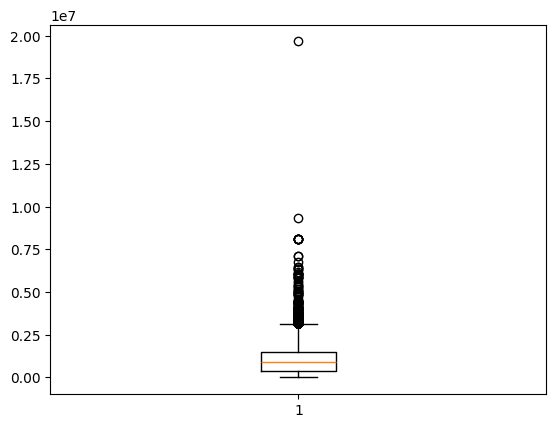

In [4]:
plt.boxplot(df["INSURED_VALUE"])

(array([2.4184e+04, 4.0200e+03, 7.5000e+01, 1.6000e+01, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([       0.   ,  1966104.988,  3932209.976,  5898314.964,
         7864419.952,  9830524.94 , 11796629.928, 13762734.916,
        15728839.904, 17694944.892, 19661049.88 ]),
 <BarContainer object of 10 artists>)

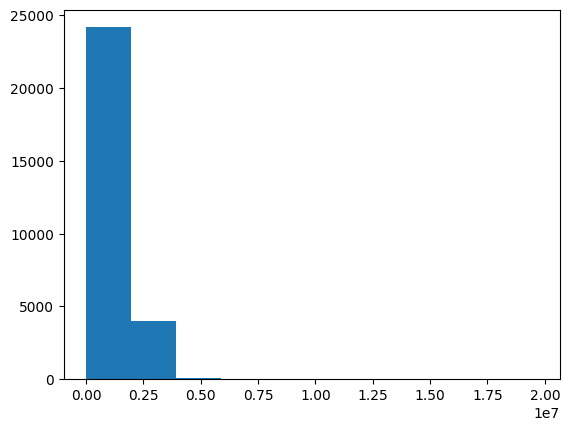

In [5]:
plt.hist(df["INSURED_VALUE"])

In [6]:
df = df[df['INSURED_VALUE'] <= 0.5*1e7]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b72e5facb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b72e5fb2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b72e5fa9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b72e5fb8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b72e5fbbb0>],
 'means': []}

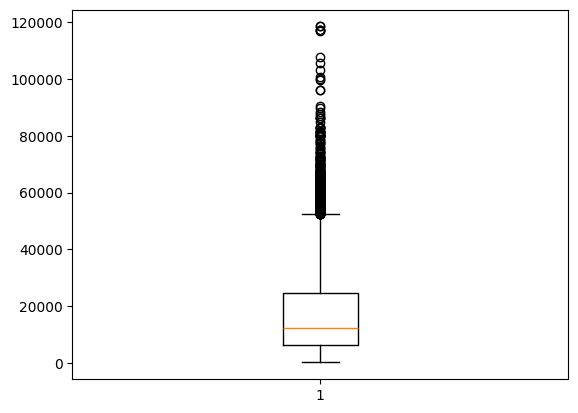

In [7]:
plt.boxplot(df["PREMIUM"])

(array([1.3727e+04, 7.1620e+03, 4.1540e+03, 2.2690e+03, 6.7900e+02,
        2.0200e+02, 4.6000e+01, 1.1000e+01, 7.0000e+00, 7.0000e+00]),
 array([   228.1  ,  12053.372,  23878.644,  35703.916,  47529.188,
         59354.46 ,  71179.732,  83005.004,  94830.276, 106655.548,
        118480.82 ]),
 <BarContainer object of 10 artists>)

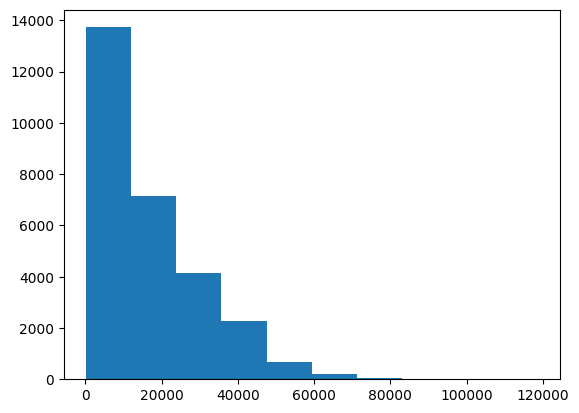

In [8]:
plt.hist(df["PREMIUM"])

In [9]:
df = df[df['PREMIUM'] <= 80000]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b72e69ed70>,
 'caps': [<matplotlib.lines.Line2D at 0x1b72e69f370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b72e69ea70>],
 'medians': [<matplotlib.lines.Line2D at 0x1b72e69f970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b72e69fc70>],
 'means': []}

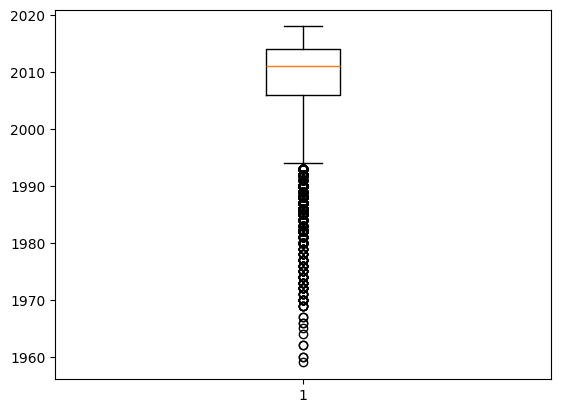

In [10]:
plt.boxplot(df["PROD_YEAR"])

(array([6.0000e+00, 2.1000e+01, 5.2000e+01, 6.2500e+02, 7.2800e+02,
        7.7400e+02, 1.8170e+03, 4.1910e+03, 9.5790e+03, 1.0431e+04]),
 array([1959. , 1964.9, 1970.8, 1976.7, 1982.6, 1988.5, 1994.4, 2000.3,
        2006.2, 2012.1, 2018. ]),
 <BarContainer object of 10 artists>)

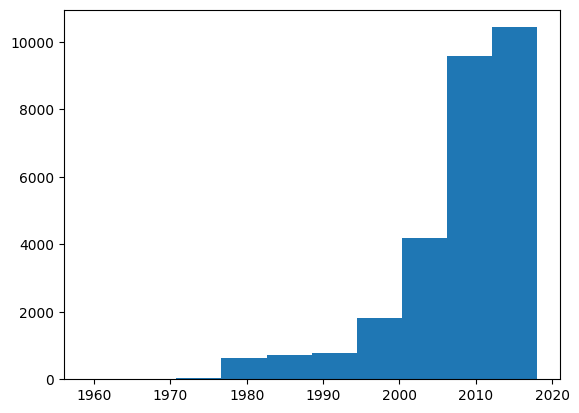

In [11]:
plt.hist(df["PROD_YEAR"])

In [12]:
df = df[df['PROD_YEAR'] >= 1970]

In [13]:
df["INSURED_VALUE"] = (df["INSURED_VALUE"] - min(df["INSURED_VALUE"])) / (max(df["INSURED_VALUE"]) - min(df["INSURED_VALUE"]))
df["PROD_YEAR"] = (df["PROD_YEAR"] - min(df["PROD_YEAR"])) / (max(df["PROD_YEAR"]) - min(df["PROD_YEAR"]))
df["PREMIUM"] = (df["PREMIUM"] - min(df["PREMIUM"])) / (max(df["PREMIUM"]) - min(df["PREMIUM"]))

X = df[["INSURED_VALUE", "PROD_YEAR"]].to_numpy()
y = df["PREMIUM"].to_numpy()

In [21]:
# Manual multiple linear regression implementation
coefficients = multiple_linear_regression(X, y)

In [22]:
coefficients

array([0.04748529, 0.601569  , 0.04208564])

We compare the manual regression coefficients to the built in manual regression coefficients:

In [24]:
model = LinearRegression()
model.fit(X, y)
# Coefficients and intercept
print("Intercept:", model.intercept_)  # y-intercept
print("Coefficients:", model.coef_)    # slope for each feature

Intercept: 0.04752594934635937
Coefficients: [0.60161372 0.04202305]


As we can see, the coefficients of our manually implemented multiple linear regression and the scikit-learn multiple linear regression are the same within the margin of error.